In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

In [2]:
# Simulate population decay due to stochastic individual events
def simulation(N0, M, p):
    # N0: initial population size
    # M: number of time steps
    # p: probability of death per time step for each individual
    S = np.zeros((M, N0))
    S[0,:] = np.ones(N0)
    for i in range(1, M):
        S[i, :] = S[i-1, :]
        aux = np.random.random(N0)
        idx = np.where(aux < p)[0]
        S[i, idx] = 0
    return S

In [3]:
N0 = 10000      # Initial population
M = 10000       # Number of time steps
p = .002        # Death probability per time step

S = simulation(N0, M, p)       # Run simulation

N = np.sum(S, axis=1)          # Population size at each time step
A = np.sum(S, axis=0)          # Longevity (number of time steps survived) for each individual


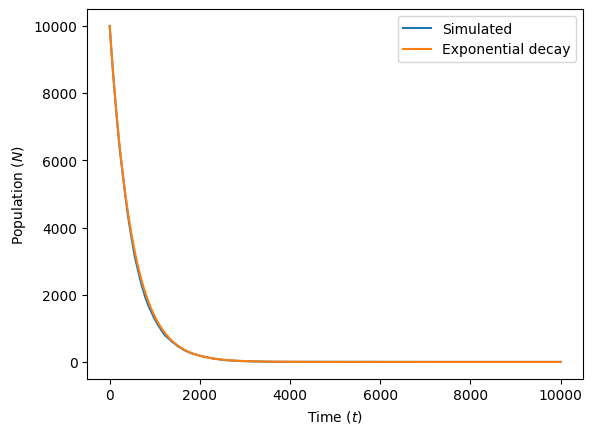

In [4]:
# Plot population decay and compare to theoretical exponential decay
plt.plot(N, label="Simulated")
plt.plot(np.arange(M), N0*np.exp(-p*np.arange(M)), label="Exponential decay")
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")
plt.legend()


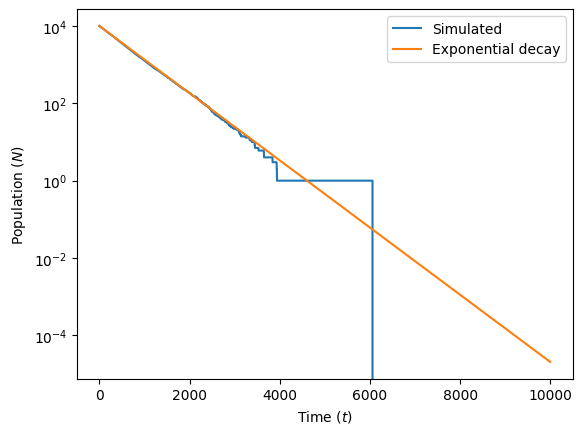

In [5]:
# Plot population decay on a logarithmic scale
plt.semilogy(N, label="Simulated")
plt.semilogy(np.arange(M), N0*np.exp(-p*np.arange(M)), label="Exponential decay")
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")
plt.legend()


Text(0, 0.5, 'Longevity')

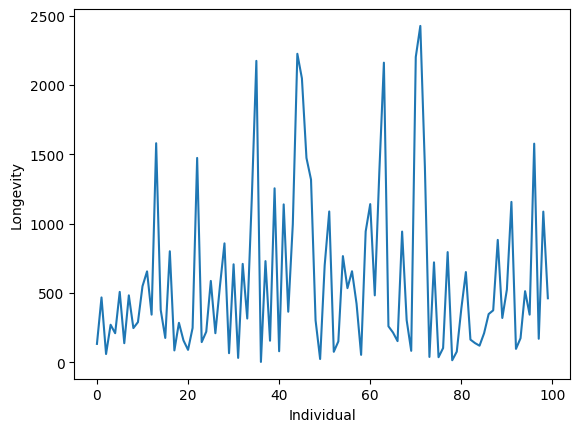

In [6]:
# Plot longevity of the first 100 individuals
plt.plot(A[:100])
plt.xlabel("Individual")
plt.ylabel("Longevity")


In [7]:
# Compare mean longevity to theoretical expectation
np.mean(A), 1/p


(np.float64(488.7733), 500.0)

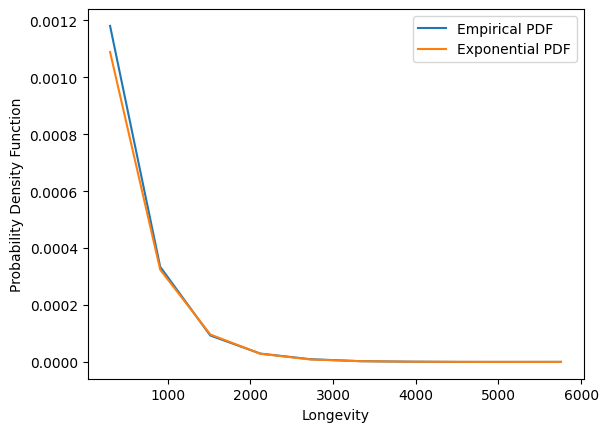

In [8]:
# Plot histogram of individual longevities and compare to exponential PDF
freqs, bins = np.histogram(A)
pdf = freqs / sum(freqs) / np.diff(bins)      # Empirical PDF
mid_bins = (bins[1:] + bins[:-1])/2           # Bin centers

plt.plot(mid_bins, pdf, label="Empirical PDF")
plt.plot(mid_bins, p*np.exp(-p*mid_bins), label="Exponential PDF")
plt.xlabel("Longevity")
plt.ylabel("Probability Density Function")
plt.legend()


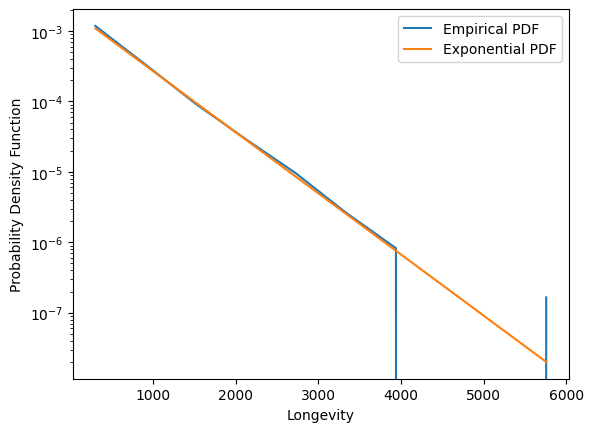

In [9]:
# Plot longevity histogram on a logarithmic scale
plt.semilogy(mid_bins, pdf, label="Empirical PDF")
plt.semilogy(mid_bins, p*np.exp(-p*mid_bins), label="Exponential PDF")
plt.xlabel("Longevity")
plt.ylabel("Probability Density Function")
plt.legend()


In [10]:
# Alternative simulation using random exponential lifetimes
def simulation2(N0, M, p):
    # Assign each individual a random lifetime from exponential distribution
    ages = expon.rvs(scale=1/p, size=N0)
    N = np.zeros(M)
    for i in range(M):
        N[i]=len(np.where(ages > i)[0])   # Count individuals alive at time i
    return(N)


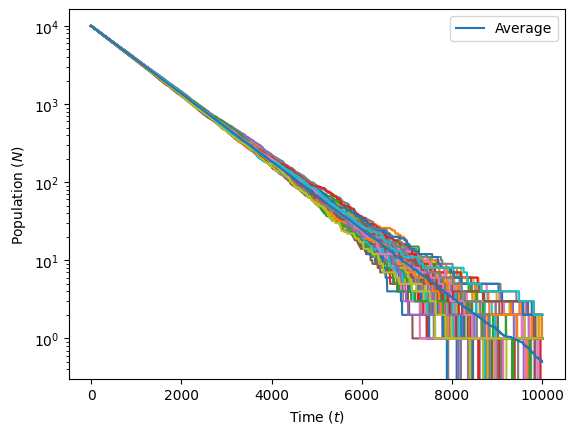

In [11]:
# Run and average multiple simulations for smoother results
N0 = 10000
M = 10000
p = .001

Navg = np.zeros(M)
for i in range(100):
    N = simulation2(N0, M, p)
    plt.semilogy(N)
    Navg = Navg + N
Navg = Navg / 100

plt.semilogy(Navg, label="Average")
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")
plt.legend()


In [12]:
# Simulation with normally distributed lifetimes
def simulation3(N0, M, p):
    # Assign each individual a random lifetime from normal distribution
    ages = norm.rvs(loc=1/p, scale=1/p, size=N0)
    N = np.zeros(M)
    for i in range(M):
        N[i]=len(np.where(ages > i)[0])   # Count individuals alive at time i
    return(N)


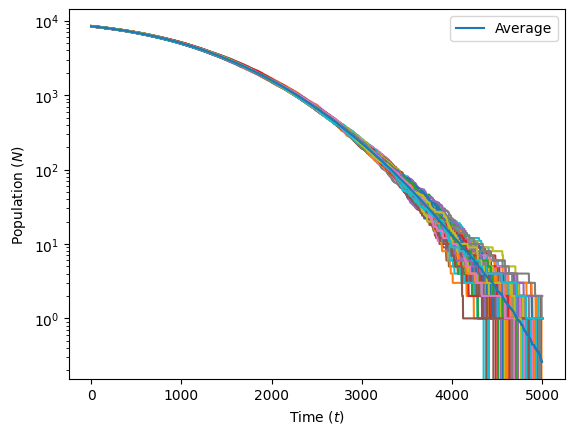

In [13]:
# Run and average multiple normal-lifetime simulations
N0 = 10000
M = 5000
p = .001

Navg = np.zeros(M)
for i in range(100):
    N = simulation3(N0, M, p)
    plt.semilogy(N)
    Navg += N
Navg /= 100

plt.semilogy(Navg, label="Average")
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population ($N$)")
plt.legend()
